<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> 
        <h1>Deep Learning From Scratch</h1>
        <h1>Simple Network</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
        @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import watermark

%load_ext watermark
%matplotlib inline

In [2]:
%watermark -i -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 20.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

Git hash: 0c0efc0550667444bda0fe2438f90df694d9769e

watermark : 2.1.0
json      : 2.0.9
matplotlib: 3.3.2
pandas    : 1.1.3
numpy     : 1.19.2
seaborn   : 0.11.0



In [3]:
plt.style.use('./d4sci.mplstyle')

## Load Dataset

In [4]:
X_train = np.load('input/X_train.npy')
X_test = np.load('input/X_test.npy')
y_train = np.load('input/y_train.npy')
y_test = np.load('input/y_test.npy')

Preprocessing

In [5]:
input_layer_size = X_train.shape[1]

X_train /= 255.
X_test /= 255.

In [6]:
X_train.shape

(5000, 784)

In [7]:
X_test.shape

(1000, 784)

## Initialize weights

We define the initializatino function as we'll have to call it more than once

In [8]:
def init_weights(L_in, L_out, epsilon = 0.12):
    return 2*np.random.rand(L_out, L_in+1)*epsilon - epsilon

Set the layer sizes we'll be using

In [9]:
hidden_layer_size = 50
num_labels = 10

Initialize the weights

In [10]:
Theta1 = init_weights(input_layer_size, hidden_layer_size)
Theta2 = init_weights(hidden_layer_size, num_labels)

## Utility functions

One-hot encoding to define the labels

In [11]:
def one_hot(K, pos):
    y0 = np.zeros(K)
    y0[pos] = 1

    return y0

In [12]:
one_hot(10, 5)

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

Activation function, just as before

In [13]:
def sigmoid(z):
    return 1./(1+np.exp(-z))

def sigmoidGradient(z):
    h = sigmoid(z)
    return h*(1-h)

def accuracy(y_, y):
    return np.mean((y_ == y.flatten()))*100.

## Forward Propagation and Prediction

Same functions defined above

In [14]:
def forward(Theta, X, active):
    N = X.shape[0]

    # Add the bias column
    X_ = np.concatenate((np.ones((N, 1)), X), 1)

    # Multiply by the weights
    z = np.dot(X_, Theta.T)

    # Apply the activation function
    a = active(z)

    return a

def predict(Theta1, Theta2, X):
    h1 = forward(Theta1, X, sigmoid)
    h2 = forward(Theta2, h1, sigmoid)

    return np.argmax(h2, 1)

## Back propagation

In [15]:
def backprop(Theta1, Theta2, X, y):
    N = X.shape[0]
    K = Theta2.shape[0]

    J = 0

    Delta2 = np.zeros(Theta2.shape)
    Delta1 = np.zeros(Theta1.shape)

    for i in range(N):
        # Forward propagation, saving intermediate results
        a1 = np.concatenate(([1], X[i]))  # Input layer

        z2 = np.dot(Theta1, a1)
        h2 = sigmoid(z2)
        a2 = np.concatenate(([1], h2))  # Hidden Layer

        z3 = np.dot(Theta2, a2)
        h3 = sigmoid(z3)  # Output layer
        a3 = h3
        
        y0 = one_hot(K, y[i])

        # Cross entropy
        J -= np.dot(y0.T, np.log(a3))+np.dot((1-y0).T, np.log(1-a3))

        # Calculate the weight deltas
        delta_3 = a3-y0
        delta_2 = np.dot(Theta2.T, delta_3)[1:]*sigmoidGradient(z2)

        Delta2 += np.outer(delta_3, a2)
        Delta1 += np.outer(delta_2, a1)

    J /= N

    Theta1_grad = Delta1/N
    Theta2_grad = Delta2/N

    return [J, Theta1_grad, Theta2_grad]

## Training procedure
The basic idea is the same as for the linear and logistic regression cases

In [16]:
step = 0
tol = 1e-3 # Minimum different in error between two consecutive steps
J_old = 1/tol
diff = 1

acc_train = []
acc_test = []
J_val = []
steps = []
alpha = 0.5

while diff > tol:
    J_train, Theta1_grad, Theta2_grad = backprop(Theta1, Theta2, X_train, y_train)

    diff = abs(J_old-J_train)
    J_old = J_train
    J_val.append(J_train)
    
    step += 1

    if step % 10 == 0:
        pred_train = predict(Theta1, Theta2, X_train)
        pred_test = predict(Theta1, Theta2, X_test)

        J_test, T1_grad, T2_grad = backprop(Theta1, Theta2, X_test, y_test)
        
        acc_train.append(accuracy(pred_train, y_train))
        acc_test.append(accuracy(pred_test, y_test))
        steps.append(step)
        
        print(step, J_train, J_test, acc_train[-1], acc_test[-1])

    Theta1 -= alpha*Theta1_grad
    Theta2 -= alpha*Theta2_grad
    
print(step, J_train, J_test, acc_train[-1], acc_test[-1])
print('DONE')

10 3.1218598683724488 3.1352679994242756 43.6 39.4
20 2.908208751574371 2.9397500551020634 55.26 51.1
30 2.6010306547217934 2.654343309562388 61.56 57.199999999999996
40 2.2830947773258874 2.353824038238989 67.14 62.8
50 2.0205555012785212 2.102868185333851 71.82 68.60000000000001
60 1.8157837943411124 1.9063100134687896 75.84 71.5
70 1.653705183258294 1.750758040014908 78.60000000000001 74.0
80 1.521818761593266 1.6245296115206298 80.9 76.2
90 1.411967326793713 1.5198654355542391 82.28 79.2
100 1.3189016474521162 1.4317200910250085 83.76 81.2
110 1.2390567854273205 1.3566180162962527 85.02 82.19999999999999
120 1.1698577619540682 1.2920002183441892 85.96000000000001 83.2
130 1.1093668221301067 1.2359076051338895 86.74 83.5
140 1.0560969428589373 1.1868237100724193 87.48 84.7
150 1.0088930789366164 1.1435729523939362 88.08 85.39999999999999
160 0.9668442157910176 1.1052379927414266 88.44 86.0
170 0.929217090411827 1.071091550486398 88.8 86.1
180 0.8954085828694913 1.0405443043101728 89

## Accuracy during training

Text(0, 0.5, 'Cost function')

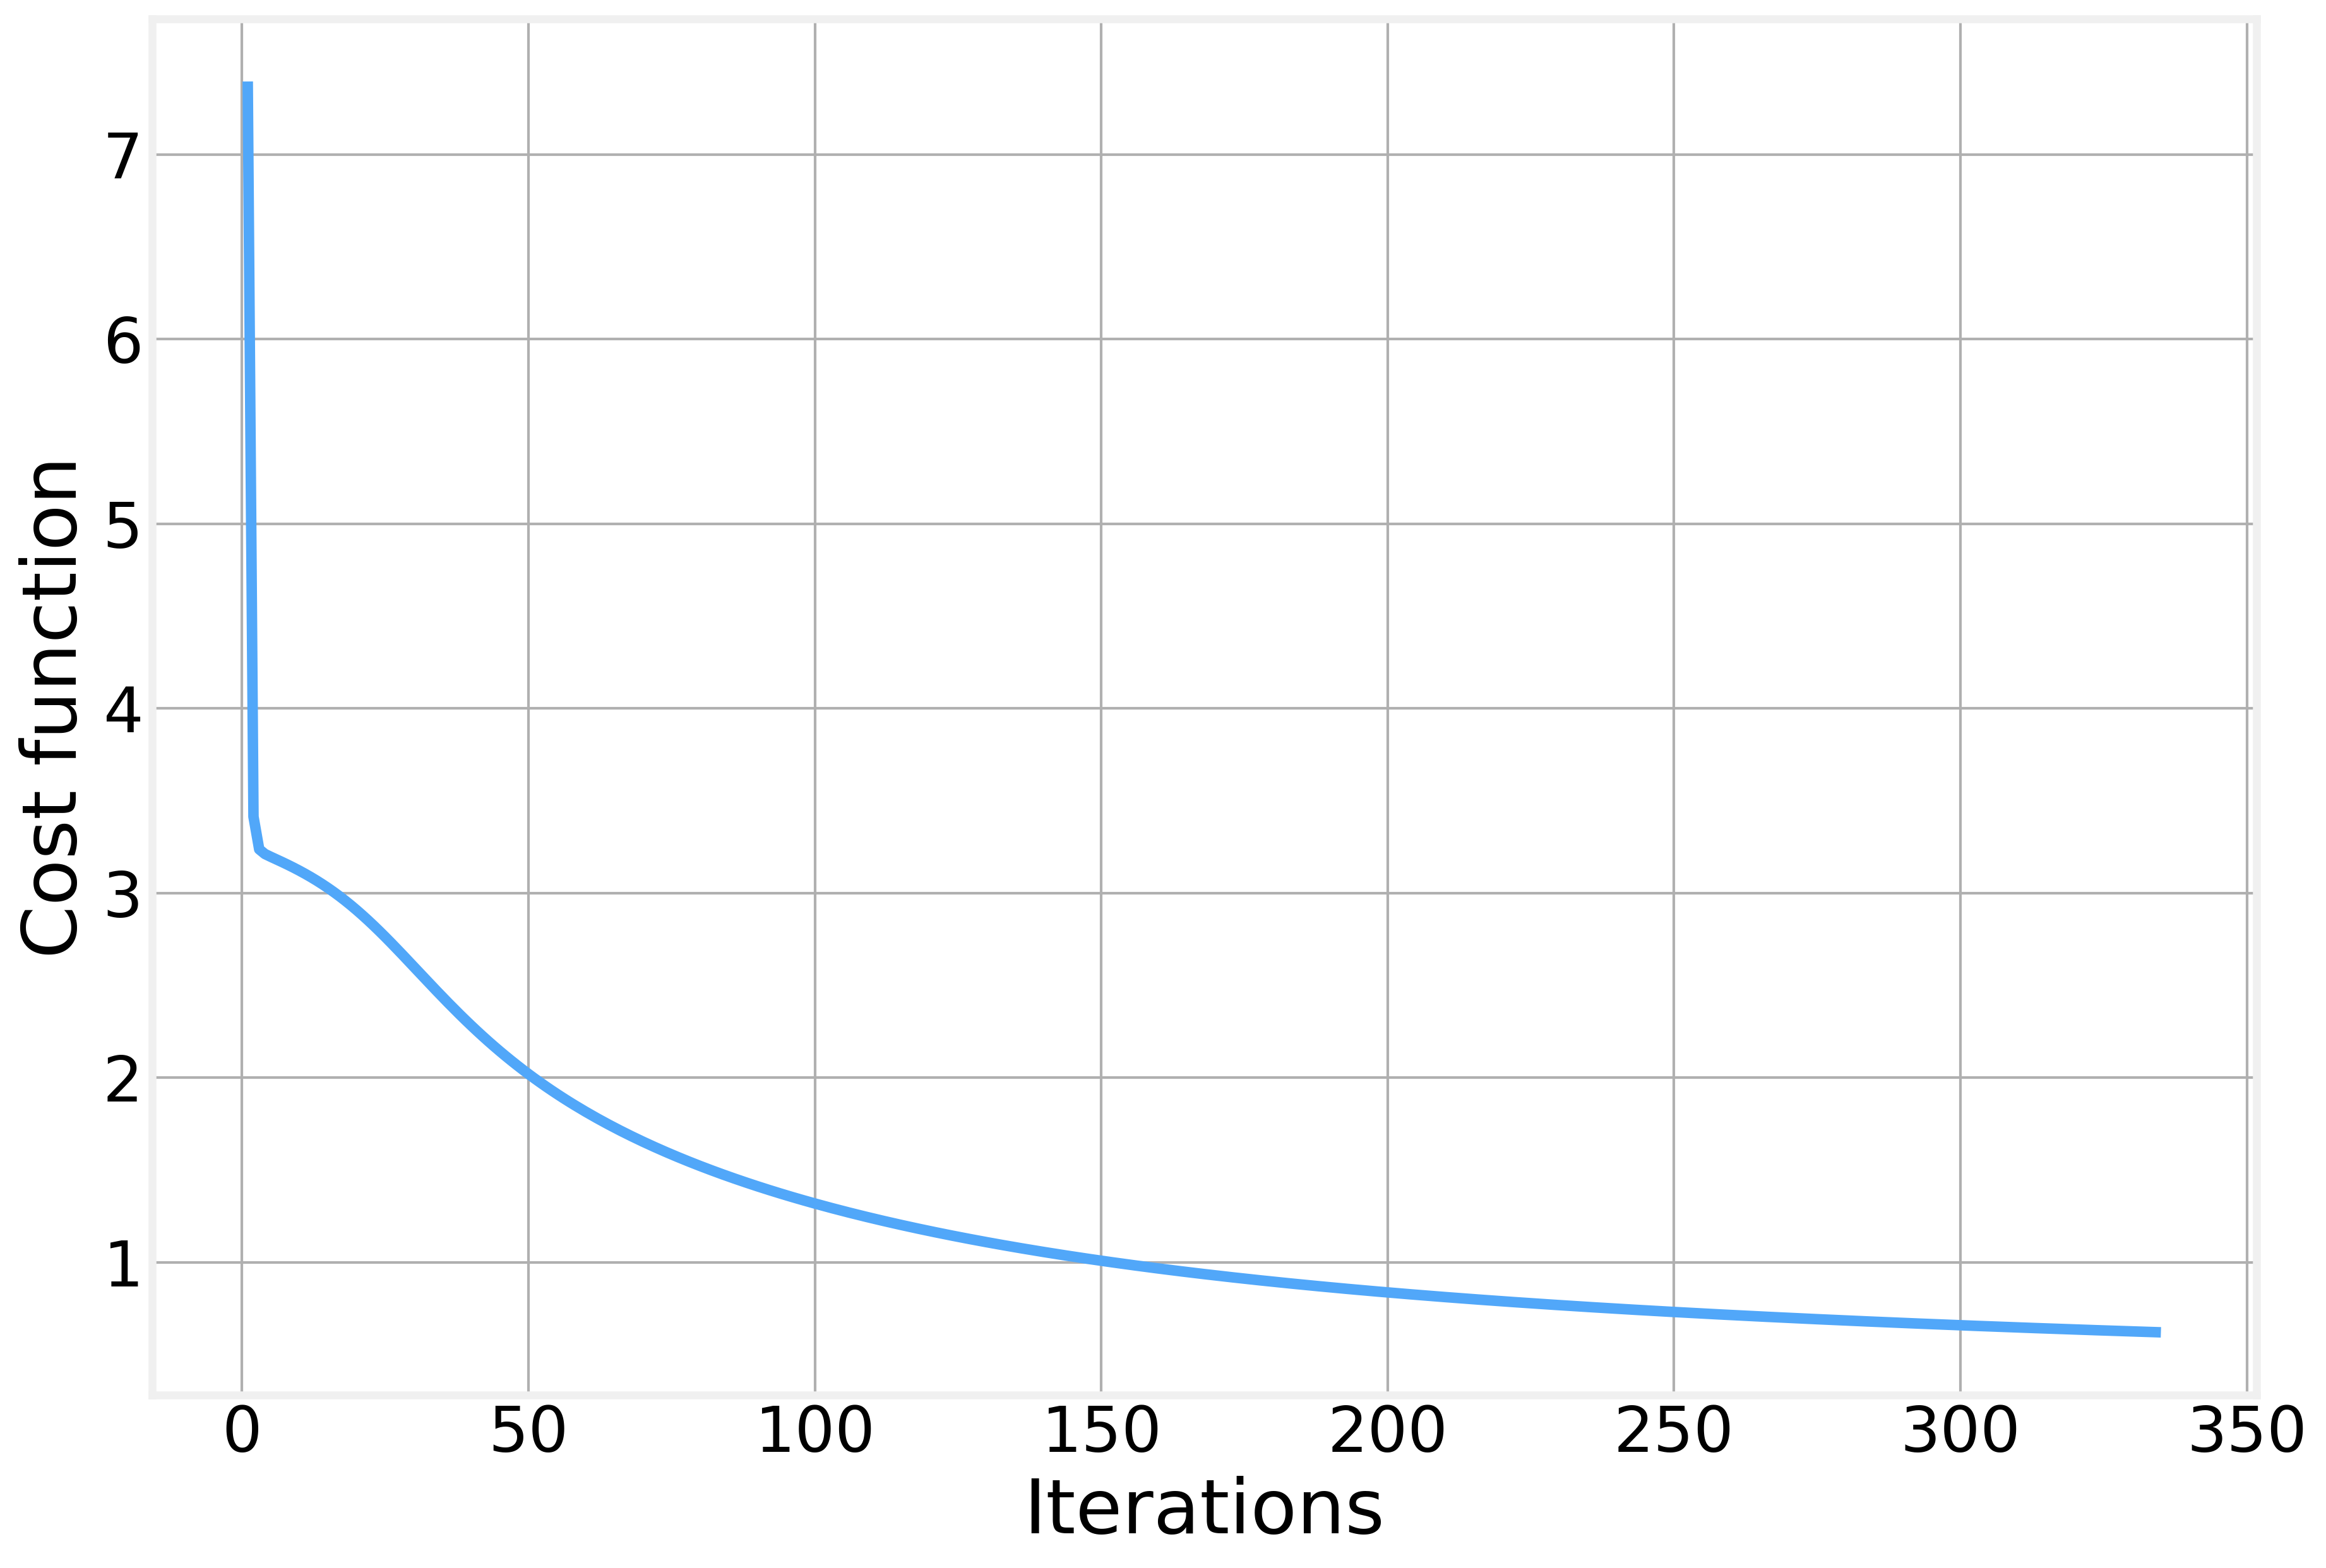

In [17]:
plt.plot(np.arange(1, len(J_val)+1), J_val)
plt.xlabel("Iterations")
plt.ylabel("Cost function")

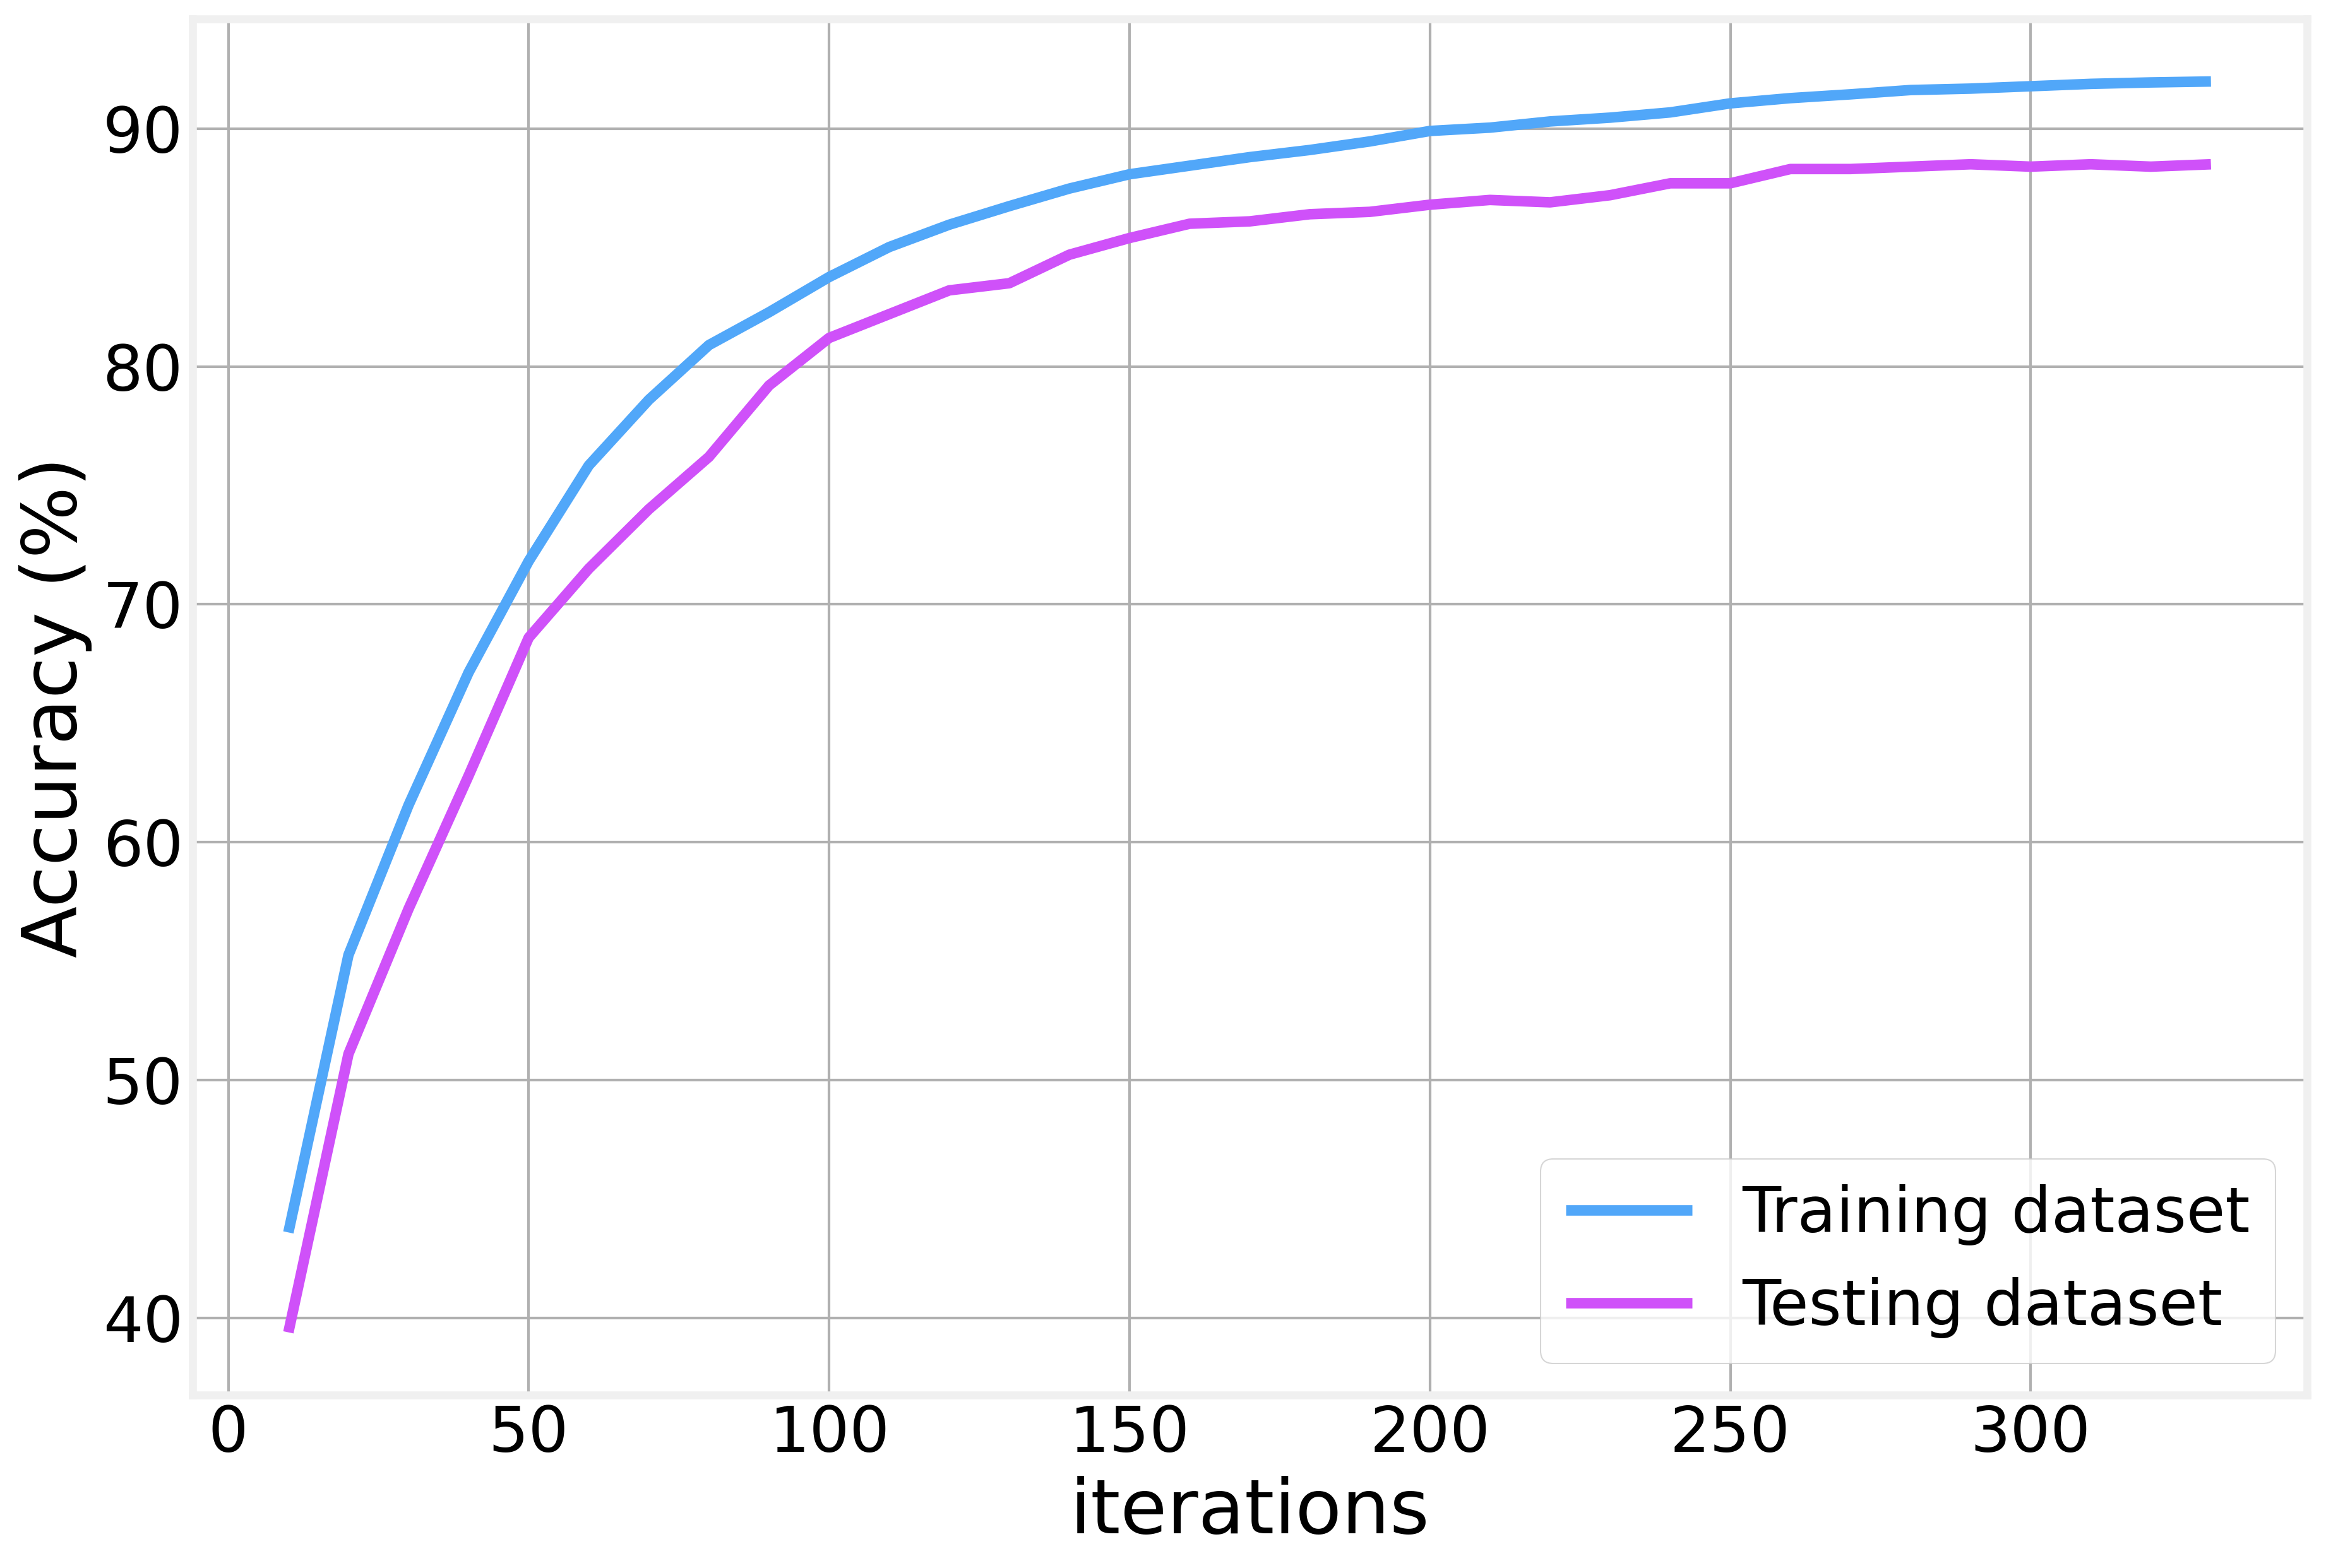

In [18]:
plt.plot(steps, acc_train, label='Training dataset')
plt.plot(steps, acc_test, label='Testing dataset')
plt.xlabel("iterations")
plt.ylabel("Accuracy (%)")
plt.legend()

## Save the trained model

In [19]:
np.save('Theta1_short.npy', Theta1)
np.save('Theta2_short.npy', Theta2)

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>